# Report on the genetic algorithm
## Libraries import

In [1]:
from genetic import Genetic
from physics import target_function
from experiment import experiment, create_table, satisfy_budget
from plotter import plot_results, plot_example, plot_bar
import pandas as pd

### Algorithm
The genetic algorithm implemented uses roulette selection with single-point crossover and generational succession.
### Example
- $\mu$ = 60
- t_max = 400
- pc = 0.85
- pm = 0.05

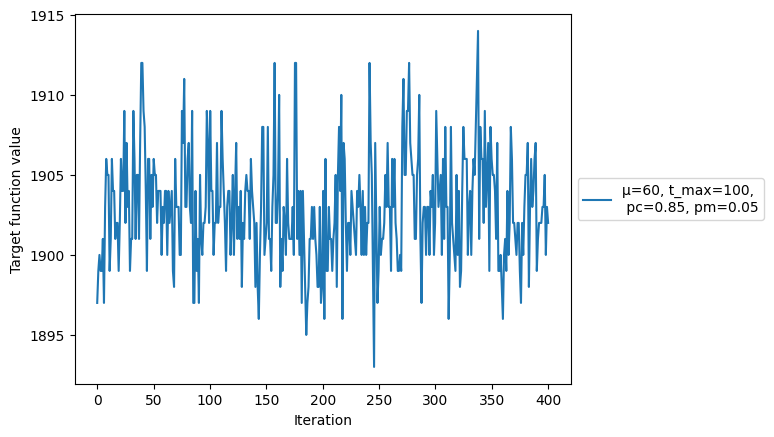

In [2]:
example = Genetic()
POP_N = 60
T_MAX = 400
PC = 0.85
PM = 0.05
ex_best = example.solve(target_function, pop_n=POP_N, t_max=T_MAX, pc=PC, pm=PM)
values = example.get_best_grades()
plot_example(values, T_MAX, "\u03BC=60, t_max=100,\n pc=0.85, pm=0.05")

## Purpose of experiments
I intend to test the performance of the algorithm for different hyperparameters. The experiments involve running 25 runs of the genetic algorithm for each combination of hyperparameters, from which the average result is then drawn, along with the standard deviation. The experiments make it possible to compare the results for different populations, since the budget of calls to the objective function is fixed (the product of the number of individuals and the number of iterations is constant). I will conduct a study of:
- 4 different combinations of individuals with the number of iterations
- 4 different probabilities of crossover
- 4 different probabilities of mutation

In [3]:
INDIVIDUALS_NUMBER = [4, 8, 20, 40]
ITERATION_NUMBER = [100, 200, 500, 1000]
CROSSOVER_RATE = [0.6, 0.75, 0.85, 0.95]
MUTATION_RATE = [0.01, 0.05, 0.1, 0.2]
BUDGET = 4000
results = experiment(INDIVIDUALS_NUMBER, ITERATION_NUMBER, CROSSOVER_RATE, MUTATION_RATE, BUDGET)
ind_and_iter = satisfy_budget(INDIVIDUALS_NUMBER, ITERATION_NUMBER, BUDGET)
table = create_table(ind_and_iter,  CROSSOVER_RATE, MUTATION_RATE, results[0], results[1])
df = pd.DataFrame(table)

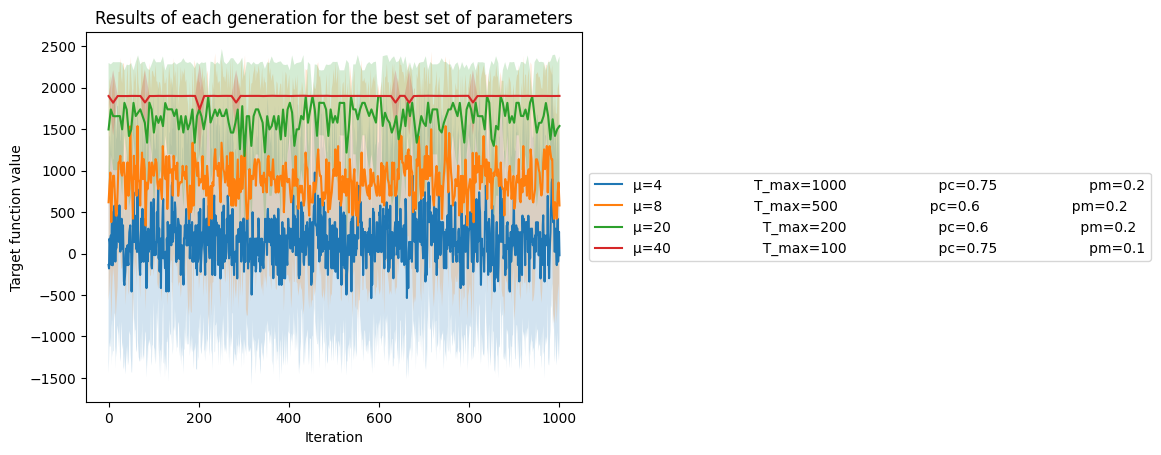

In [4]:
plot_results(table, results[0], results[2], results[3])

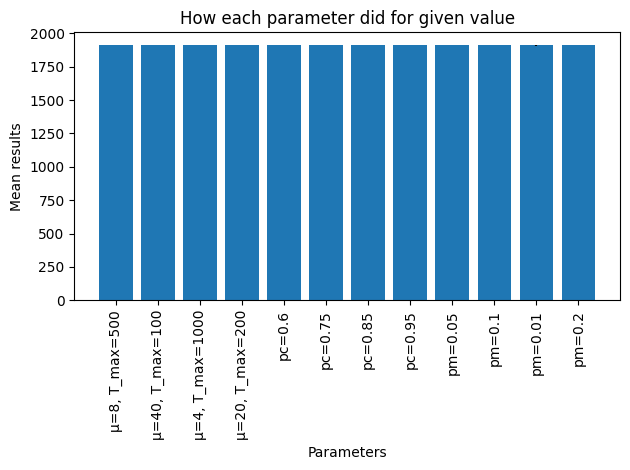

In [5]:
parameters = ["Individuals number", "Cross probability", "Mutation probability"]
shortcuts = {"Individuals number": "\u03BC", "t_max": "T_max", "Cross probability": "pc", "Mutation probability": "pm"}
plot_bar(table, results[0], parameters, shortcuts)

# Results
- A larger number of individuals at the expense of fewer iterations always achieved a higher average score.
- The higher the number of individuals, the higher the standard deviation.
- The worst results are achieved for pm=0.01
- Other results are more similar.
# Conclusions
- Roulette selection makes us uncertain whether we will keep the best solution, which leads to the fact that subsequent generations can be worse than previous ones (Figure One).
- A larger number of individuals significantly expands exploration which can lead to much better and much worse results (larger standard deviation).
- Mutation probability pm=0.01 achieved the worst average results. This means that it was too small to sufficiently explore the search space.
- It is impossible to choose a single best parameter, because the best results were achieved with a combination that gave an appropriate balance between exploitation and exploration.
- The parameters that best preserve this balance for the given problem: $\mu$=40, T_max=100, pc=0.75, pm=0.05